             Feature Transformation and Scaling Techniques to Boost Your Model Performance

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

There are a couple of go-to techniques I always use regardless of the model I am using, or whether it is a classification task or regression task, or even an unsupervised learning model. These techniques are:

Feature Transformation and
Feature Scaling.

Part-01
Table of Contents
1. Why do we need Feature Transformation and Scaling?
2. MinMax Scaler (default range 0,1 - but we can define our own too)
3. Standard Scaler (Mean as 0 and S.D as 1)
4. MaxAbsScaler (Scales the data in the range -1,1)
5. Robust Scaler (Range is Q3, Q1)
6. Quantile Transformer Scaler
7. Log Transformation
8. Power Transformer Scaler
9. Unit Vector Scaler/Normalizer

Part-02
Table of Contents
1. Skewness and Kurtosis
2. Visually Inspect the Distribution of Your Variables
3. Measures of Skewness and Kurtosis in Python
4. Square Root Transformation in Python
5. Transforming Negatively Skewed Data with the Square Root Method
6. Log Transformation in Python
7. Log Transforming Negatively Skewed Data
8. Box-Cox Transformation in Python
9. Conclusion

Why do we need Feature Transformation and Scaling?
Oftentimes, we have datasets in which different columns have different units – like one column can be in kilograms, while another column can be in centimeters. Furthermore, we can have columns like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling.

In most examples of machine learning models, you would have observed either the Standard Scaler or MinMax Scaler. However, the powerful sklearn library offers many other feature transformations scaling techniques as well, which we can leverage depending on the data we are dealing with. So, what are you waiting for?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.DataFrame({
    'Income': [15000, 1800, 120000, 10000],
    'Age': [25, 18, 42, 51],
    'Department': ['HR','Legal','Marketing','Management']
})

Before directly applying any feature transformation or scaling technique, we need to remember the categorical column: Department and first deal with it. This is because we cannot scale non-numeric values.

For that, we 1st create a copy of our dataframe and store the numerical feature names in a list, and their values as well:

In [6]:
df_scaled = df.copy()
col_names = ['Income', 'Age']
features = df_scaled[col_names]

                                        MinMax Scaler

MinMax Scaler

The MinMax scaler is one of the simplest scalers to understand.  It just scales all the data between 0 and 1. The formula for calculating the scaled value is-

x_scaled = (x – x_min)/(x_max – x_min)
Thus, a point to note is that it does so for every feature separately. Though (0, 1) is the default range, we can define our range of max and min values as well. 

In [7]:
#We will first need to import it

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Apply it on only the values of the features:

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.111675,0.212121,HR
1,0.000000,0.000000,Legal
2,1.000000,0.727273,Marketing
3,0.069374,1.000000,Management


You can see how the values were scaled. The minimum value among the columns became 0, and the maximum value was changed to 1, with other values in between. However, suppose we don’t want the income or age to have values like 0. Let us take the range to be (5, 10)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,5.558376,6.060606,HR
1,5.000000,5.000000,Legal
2,10.000000,8.636364,Marketing
3,5.346870,10.000000,Management


                                        Standard Scaler

Standard Scaler

Just like the MinMax Scaler, the Standard Scaler is another popular scaler that is very easy to understand and implement.

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

x_scaled = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we

either choose a different scaler
or first, convert the variables to a normal distribution and then apply this scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,-0.449056,-0.685248,HR
1,-0.722214,-1.218219,Legal
2,1.723796,0.609110,Marketing
3,-0.552525,1.294358,Management


                                             MaxAbsScaler

MaxAbsScaler

In simplest terms, the MaxAbs scaler takes the absolute maximum value of each column and divides each value in the column by the maximum value.

Thus, it first takes the absolute value of each value in the column and then takes the maximum value out of those. This operation scales the data between the range [-1, 1].  To see how it works, we will add another column called ‘Balance” which contains negative values:

In [10]:
df["Balance"] = [100.0, -263.0, 2000.0, -5.0]
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125000,0.490196,HR
1,0.015000,0.352941,Legal
2,1.000000,0.823529,Marketing
3,0.083333,1.000000,Management


                                             Robust Scaler

Robust Scaler

If you have noticed in the scalers we used so far, each of them was using values like the mean, maximum and minimum values of the columns. All these values are sensitive to outliers. 

If there are too many outliers in the data, they will influence the mean and the max value or the min value. Thus, even if we scale this data using the above methods, we cannot guarantee a balanced data with a normal distribution.

The Robust Scaler, as the name suggests is not sensitive to outliers. This scaler-

removes the median from the data
scales the data by the InterQuartile Range(IQR)

Are you familiar with the Inter-Quartile Range? It is nothing but the difference between the first and third quartile of the variable. The interquartile range can be defined as-

IQR = Q3 – Q1

Thus, the formula would be:

x_scaled = (x – Q1)/(Q3 – Q1)

This is the default range, though we can define our own range if we want to. Now let us see how can we implement the Robust Scaler in python:

In [11]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.075075,-0.404762,HR
1,-0.321321,-0.738095,Legal
2,3.228228,0.404762,Marketing
3,-0.075075,0.833333,Management


                                    Quantile Transformer Scaler

One of the most interesting feature transformation techniques that I have used, the Quantile Transformer Scaler converts the variable distribution to a normal distribution. and scales it accordingly. 
Since it makes the variable normally distributed, it also deals with the outliers. Here are a few important points regarding the Quantile Transformer Scaler:

1. It computes the cumulative distribution function of the variable

2. It uses this cdf to map the values to a normal distribution

3. Maps the obtained values to the desired output distribution using the associated quantile function

A caveat to keep in mind though: Since this scaler changes the very distribution of the variables, linear relationships among variables may be destroyed by using this scaler. 

Thus, it is best to use this for non-linear data. Here is the code for using the Quantile Transformer:

In [12]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

C:\Users\AbinSRajan\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (4). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,Income,Age,Department
0,0.666667,0.333333,HR
1,0.000000,0.000000,Legal
2,1.000000,0.666667,Marketing
3,0.333333,1.000000,Management


https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f

                                        Log Transform

Log Transform
The Log Transform is one of the most popular Transformation techniques out there. It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. In this transform, we take the log of the values in a column and use these values as the column instead.

Why does it work? It is because the log function is equipped to deal with large numbers. Here is an example-

log(10) = 1

log(100) = 2, and

log(10000) = 4.

In [14]:
df['log_income'] = np.log(df['Income'])
# We created a new column to store the log values
df

,Income,Age,Department,Balance,log_income
0,15000,25,HR,100.0,9.615805
1,1800,18,Legal,-263.0,7.495542
2,120000,42,Marketing,2000.0,11.695247
3,10000,51,Management,-5.0,9.210340


Wow! While our Income column had extreme values ranging from 1800 to 1,20,000 – the log values are now ranging from approximately 7.5 to 11.7! Thus, the log operation had a dual role:

Reducing the impact of too-low values
Reducing the impact of too-high values.

A small caveat though – if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data. In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

https://rcompanion.org/handbook/I_12.html

https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

                                     Power Transformer Scaler

I often use this feature transformation technique when I am building a linear model. To be more specific, I use it when I am dealing with heteroskedasticity. 
Like some other scalers we studied above, the Power Transformer also changes the distribution of the variable, as in, it makes it more Gaussian(normal). 
We are familiar with similar power transforms such as square root, and cube root transforms, and log transforms.

However, to use them, we need to first study the original distribution, and then make a choice. The Power Transformer actually automates this decision making by introducing a parameter called lambda. It decides on a generalized power transform by finding the best value of lambda using either the:

1. Box-Cox transform

2. The Yeo-Johnson transform

While I will not get into too much detail of how each of the above transforms works, it is helpful to know that Box-Cox works with only positive values, while Yeo-Johnson works with both positive and negative values.

In our case, we will use the Box-Cox transform since all our values are positive.

In [15]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'box-cox')

'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.125158,-0.597385,HR
1,-1.395497,-1.301984,Legal
2,1.419403,0.681202,Marketing
3,-0.149064,1.218168,Management


                                   Unit Vector Scaler/Normalizer

Unit Vector Scaler/Normalizer
Normalization is the process of scaling individual samples to have unit norm. The most interesting part is that unlike the other scalers which work on the individual column values, the Normalizer works on the rows! Each row of the dataframe with at least one non-zero component is rescaled independently of other samples so that its norm (l1, l2, or inf) equals one.

Just like MinMax Scaler, the Normalizer also converts the values between 0 and 1, and between -1 to 1 when there are negative values in our data.

However, there is a difference in the way it does so.

If we are using L1 norm, the values in each column are converted so that the sum of their absolute values along the row = 1
If we are using L2 norm, the values in each column are first squared and added so that the sum of their absolute values along the row = 1

In [16]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Income,Age,Department
0,0.999999,0.001667,HR
1,0.999950,0.010000,Legal
2,1.000000,0.000350,Marketing
3,0.999987,0.005100,Management


                                        Custom Transformer

Custom Transformer
Consider this situation – Suppose you have your own Python function to transform the data. Sklearn also provides the ability to apply this transform to our dataset using what is called a FunctionTransformer.

Let us take a simple example. I have a feature transformation technique that involves taking (log to the base 2) of the values. In NumPy, there is a function called log2 which does that for us.

Thus, we can now apply the FunctionTransformer:

In [17]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log2, validate = True)

df_scaled[col_names] = transformer.transform(features.values)
df_scaled

,Income,Age,Department
0,13.872675,4.643856,HR
1,10.813781,4.169925,Legal
2,16.872675,5.392317,Marketing
3,13.287712,5.672425,Management


End Notes
To summarize saw the effects of feature transformation and scaling on our data and when to use which scaler. Also, we noticed that some scalers were sensitive to outliers, while others were robust. We also noticed how some scalers change the underlying distribution of the data itself.

Each feature scaling technique has its own characteristics which we can leverage to improve our model. However, just like other steps in building a predictive model, choosing the right scaler is also a trial and error process, and there is no single best scaler that works every time.

Keeping all these in mind, I encourage you to take up various datasets with different kinds of values and try applying these feature transformation and scaling techniques on them. 

https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

                                     Skewness and Kurtosis

Skewness and Kurtosis
Briefly, skewness is a measure of symmetry. To be exact, it is a measure of lack of symmetry. This means that the larger the number is the more your data lack symmetry (not normal, that is). Kurtosis, on the other hand, is a measure of whether your data is heavy- or light-tailed relative to a normal distribution. See here for a more mathematical definition of both measures. A good way to visually examine data for skewness or kurtosis is to use a histogram. Note, however, that there are, of course, also different statistical tests that can be used to test if your data is normally distributed.

In [21]:
import os
os.chdir('C:/Users/AbinSRajan/OneDrive - Enquero/Desktop/Project/Gen_Notebook')
# Reading dataset with skewed distributions
df = pd.read_csv('Data_to_Transform.csv')
df.head(2)

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762


                        Visually Inspect the Distribution of Your Variables

array([[<AxesSubplot:title={'center':'Moderate Positive Skew'}>,
        <AxesSubplot:title={'center':'Highly Positive Skew'}>],
       [<AxesSubplot:title={'center':'Moderate Negative Skew'}>,
        <AxesSubplot:title={'center':'Highly Negative Skew'}>]],
      dtype=object)

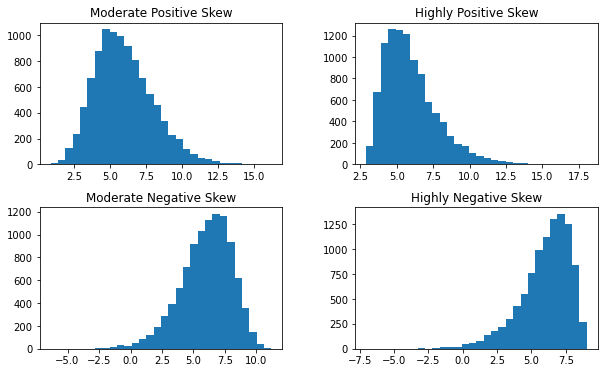

In [22]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

Measures of Skewness and Kurtosis in Python

In this section, before we start learning how to transform skewed data in Python, we will just have a quick look at how to get skewness and kurtosis in Python. 

In the code chunk above, we used the agg() method and used a list as the only parameter. This list contained the two methods that we wanted to use (i.e., we wanted to calculate skewness and kurtosis). Finally, we used the transpose() method to change the rows to columns (i.e., transpose the Pandas dataframe) so that we get an output that is a bit easier to check. Here’s the resulting table:
    
	Skewness
Fairly Symmetrical	-0.5 to 0.5
Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
Highly Skewed	< -1.0 and > 1.0

There are, of course, more things that can be done to test whether our data is normally distributed. For example, we can carry out statistical tests of normality such as the Shapiro-Wilks test. It is worth noting, however, that most of these tests are susceptible for the sample size. That is, even small deviations from normality will be found using e.g. the Shapiro-Wilks test.

In [23]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Moderate Positive Skew,0.656308,0.584120
Highly Positive Skew,1.271249,2.405999
Moderate Negative Skew,-0.690244,0.790534
Highly Negative Skew,-1.201891,2.086863


                                Square Root Transformation in Python

In [25]:
# Python Square root transformation
df.insert(len(df.columns), 'A_Sqrt',
         np.sqrt(df.iloc[:,0]))

<AxesSubplot:>

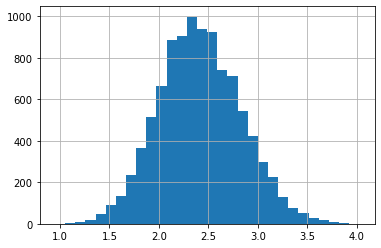

In [27]:
df['A_Sqrt'].hist(bins=30)

                       Transforming Negatively Skewed Data with the Square Root Method

What we did, above, was to reverse the distribution (i.e., max(df.iloc[:, 2] + 1) - df.iloc[:, 2]) and then applied the square root transformation. You can see, in the image below, that skewness becomes positive when reverting the negatively skewed distribution. 

In [29]:
# Square root transormation on left skewed data in Python:
df.insert(len(df.columns), 'B_Sqrt',
         np.sqrt(max(df.iloc[:, 2]+1) - df.iloc[:, 2]))

<AxesSubplot:>

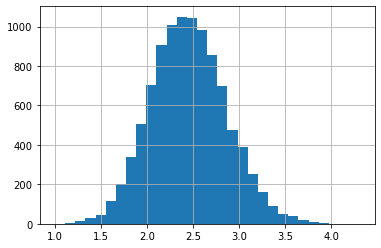

In [30]:
df['B_Sqrt'].hist(bins=30)

                                  Log Transformation in Python

<AxesSubplot:>

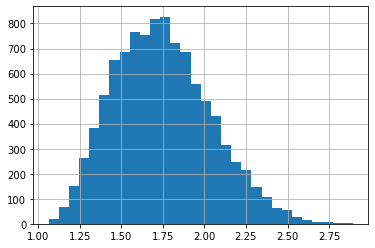

In [31]:
# Python log transform
df.insert(len(df.columns), 'C_log',
         np.log(df['Highly Positive Skew']))

df['C_log'].hist(bins=30)

Log Transforming Negatively Skewed Data

<AxesSubplot:>

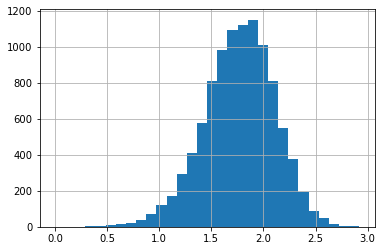

In [32]:
# Log transformation of negatively (left) skewed data in Python
df.insert(len(df.columns), 'D_log',
         np.log(max(df.iloc[:, 2] + 1) - df.iloc[:, 2]))

df['D_log'].hist(bins=30)

                                 Box-Cox Transformation in Python

<AxesSubplot:>

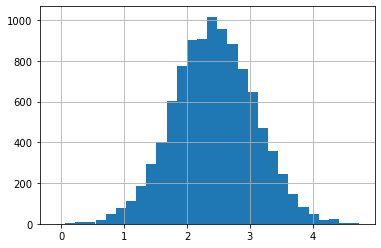

In [35]:
from scipy.stats import boxcox

# Box-Cox Transformation in Python
df.insert(len(df.columns), 'A_Boxcox', 
              boxcox(df.iloc[:, 0])[0])

df['A_Boxcox'].hist(bins=30)

Once again, we managed to transform our positively skewed data to a relatively symmetrical distribution. Now, the Box-Cox transformation also requires our data to only contain positive numbers so if we want to apply it on negatively skewed data we need to reverse it (see the previous examples on how to reverse your distribution). If we try to use boxcox() on the column “Moderate Negative Skewed”, for example, we get a ValueError. 

More exactly, if you get the “ValueError: Data must be positive” while using either np.sqrt(), np.log() or SciPy’s boxcox() it is because your dependent variable contains negative numbers. To solve this, you can reverse the distribution. 

It is worth noting, here, that we can now check the skewness using the skew() method:

In [36]:
df.agg(['skew']).transpose()

,skew
Moderate Positive Skew,0.656308
Highly Positive Skew,1.271249
Moderate Negative Skew,-0.690244
Highly Negative Skew,-1.201891
A_Sqrt,0.152479
B_Sqrt,0.179761
C_log,0.398780
D_log,-0.361324
A_Boxcox,0.000155
